In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib.colors as mcolors
import random

In [8]:
random_indices = random.sample(range(1000), 50)
type(random_indices)

list

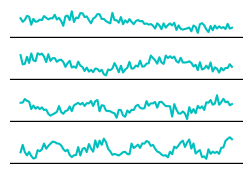

In [40]:
import matplotlib.pyplot as plt
import numpy as np
# Sample data generation
np.random.seed(0)
time = np.linspace(0, 10, 100)

# Define different frequencies and phases
frequencies = [0.5, 1, 2, 3]
phases = [0, np.pi/4, np.pi/2, np.pi]

samples = [np.sin(f * time + p) + np.random.normal(0, 0.5, len(time))  # Increased noise level
           for f, p in zip(frequencies, phases)]

# Create the subplots with space between them
fig, axs = plt.subplots(len(samples), 1, figsize=(3, 2), gridspec_kw={'hspace': 0.5})  # Control vertical space

for ax, sample in zip(axs, samples):
    ax.plot(time, sample, color='c')
    ax.axis('off')  # Turn off the axis
    ax.axhline(y=-2.3, color='black', linewidth=1)  # Add a horizontal line

# Save the figure as a smaller size image
plt.savefig('spaced_stacked_time_series_with_lines.svg', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [26]:
result

array([[ 500,    0],
       [ 500,    1],
       [1000,    0],
       [1000,    1],
       [1500,    0],
       [1500,    1]])

In [14]:
action_ranges

array([7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2])

In [12]:
arrays_list[0]

array([[0.31341837, 0.0528716 , 0.67032545, ..., 0.41995078, 0.58630741,
        0.01755064],
       [0.79592433, 0.79456302, 0.78239198, ..., 0.92310338, 0.30994341,
        0.05198608],
       [0.23638359, 0.01187015, 0.33108536, ..., 0.99019878, 0.67650976,
        0.4984426 ],
       ...,
       [0.94664521, 0.42810518, 0.01011402, ..., 0.10397708, 0.63296009,
        0.14424344],
       [0.85908882, 0.15165804, 0.09417623, ..., 0.42143848, 0.61243602,
        0.08683954],
       [0.85057499, 0.61355554, 0.60397121, ..., 0.83418406, 0.14329591,
        0.81349317]])

In [43]:
def cpu_mem_usage(df):

    df['cpu_request'] = df['cpu_request'].str.replace('m', '').astype(int)
    df['cpu_usage'] = df['cpu_usage'].str.replace('m', '').astype(int)

    # Convert 'memory_request' and 'memory_usage' from string to integer values (MiB)
    df['memory_request'] = df['memory_request'].str.replace('Mi', '').astype(int)
    df['memory_usage'] = df['memory_usage'].str.replace('Mi', '').astype(int)

    # Calculate CPU usage percentage
    df['cpu_usage_percentage'] = (df['cpu_usage'] / df['cpu_request']) * 100

    # Calculate memory usage percentage
    df['memory_usage_percentage'] = (df['memory_usage'] / df['memory_request']) * 100

    return df

## Nano

In [44]:
## NANO
dfn0 = pd.read_csv('yolov8/logs/nano/dataset_yolo8n_b0_20240718_162300.csv')
dfn1 = pd.read_csv('yolov8/logs/nano/dataset_yolo8n_b1_20240718_164758.csv')
dfn15 = pd.read_csv('yolov8/logs/nano/dataset_yolo8n_b15_20240718_170908.csv')
dfn0.shape, dfn1.shape, dfn15.shape

((1000, 10), (1000, 10), (1000, 10))

In [45]:
dfn15.head()

,Time,Model Name,File Name,Propagation Delay (s),Processing Delay (ms),E2E Delay (s),location,core,model_acc,ram
0,1.721319e+09,nano,6.jpg,0.289418,2745.587349,3.064744,belgium,1500,37.3,1000
1,1.721319e+09,nano,6.jpg,0.151680,201.943159,0.374671,belgium,1500,37.3,1000
2,1.721319e+09,nano,6.jpg,0.287283,201.474667,0.512148,belgium,1500,37.3,1000
3,1.721319e+09,nano,6.jpg,0.215210,206.499577,0.448623,belgium,1500,37.3,1000
4,1.721319e+09,nano,6.jpg,0.351243,201.347589,0.575218,belgium,1500,37.3,1000


## Small

In [46]:
## SMALL
dfs0 = pd.read_csv('yolov8/logs/small/dataset_yolo8s_b0_20240718_172919.csv')
dfs1 = pd.read_csv('yolov8/logs/small/dataset_yolo8s_b1_20240718_175637.csv')
dfs15 = pd.read_csv('yolov8/logs/small/dataset_yolo8s_b15_20240718_181713.csv')
dfs0.shape, dfs1.shape, dfs15.shape

((1000, 10), (1000, 10), (1000, 10))

In [47]:
dfs15.head()

,Time,Model Name,File Name,Propagation Delay (s),Processing Delay (ms),E2E Delay (s),location,core,model_acc,ram
0,1.721323e+09,small,6.jpg,0.501919,3239.502668,3.772406,belgium,1500,44.9,1000
1,1.721323e+09,small,6.jpg,0.267035,451.946020,0.748105,belgium,1500,44.9,1000
2,1.721323e+09,small,6.jpg,0.570311,460.651159,1.052472,belgium,1500,44.9,1000
3,1.721323e+09,small,6.jpg,0.157531,455.346107,0.634317,belgium,1500,44.9,1000
4,1.721323e+09,small,6.jpg,0.358758,465.140104,0.847708,belgium,1500,44.9,1000


## Medium

In [48]:
## MEDIUM
dfm0 = pd.read_csv('yolov8/logs/medium/dataset_yolo8m_b0_20240718_183936.csv')
dfm1 = pd.read_csv('yolov8/logs/medium/dataset_yolo8m_b1_20240718_192859.csv')
dfm15 = pd.read_csv('yolov8/logs/medium/dataset_yolo8m_b15_20240718_200015.csv')
dfm0.shape, dfm1.shape, dfm15.shape

((1000, 10), (1000, 10), (1000, 10))

In [49]:
dfm15.head()

,Time,Model Name,File Name,Propagation Delay (s),Processing Delay (ms),E2E Delay (s),location,core,model_acc,ram
0,1.721329e+09,medium,6.jpg,0.350405,4145.478725,4.525102,belgium,1500,50.2,1000
1,1.721329e+09,medium,6.jpg,0.258499,1087.746382,1.367511,belgium,1500,50.2,1000
2,1.721329e+09,medium,6.jpg,0.407944,1244.469404,1.683694,belgium,1500,50.2,1000
3,1.721329e+09,medium,6.jpg,0.223958,1106.155396,1.352068,belgium,1500,50.2,1000
4,1.721329e+09,medium,6.jpg,0.851219,1112.578869,1.988330,belgium,1500,50.2,1000


In [50]:
df = [dfn0, dfn1, dfn15, dfs0, dfs1, dfs15, dfm0, dfm1, dfm15]
latency_bound = 800
df = pd.concat(df, axis=0)
df.reset_index(drop=True, inplace=True)
df.shape

(9000, 10)

In [51]:
df.tail()

,Time,Model Name,File Name,Propagation Delay (s),Processing Delay (ms),E2E Delay (s),location,core,model_acc,ram
8995,1.721331e+09,medium,6.jpg,0.418686,1121.546268,1.567816,belgium,1500,50.2,1000
8996,1.721331e+09,medium,6.jpg,0.247726,1126.667738,1.401177,belgium,1500,50.2,1000
8997,1.721331e+09,medium,6.jpg,0.333923,1112.436056,1.472996,belgium,1500,50.2,1000
8998,1.721331e+09,medium,6.jpg,0.567916,1108.678102,1.693976,belgium,1500,50.2,1000
8999,1.721331e+09,medium,6.jpg,0.394643,1110.683203,1.535163,belgium,1500,50.2,1000


In [52]:
svr = df[df['Processing Delay (ms)'] > latency_bound]
# Count SLA violations for each core
svr_counts = svr.groupby(['Model Name','core']).size().reset_index(name='violation_count')
svr_counts['per_core_violations'] = (svr_counts['violation_count']/1000)*100
# Generate all possible combinations of model and core
models = df['Model Name'].unique()
cores = df['core'].unique()
all_combinations = pd.DataFrame(list(itertools.product(models, cores)), columns=['Model Name', 'core'])
complete_sla_violation_counts = all_combinations.merge(svr_counts, on=['Model Name', 'core'], how='left')
svr = complete_sla_violation_counts
svr

,Model Name,core,violation_count,per_core_violations
0,nano,500,1,0.1
1,nano,1000,1,0.1
2,nano,1500,1,0.1
3,small,500,1000,100.0
4,small,1000,1,0.1
5,small,1500,1,0.1
6,medium,500,1000,100.0
7,medium,1000,1000,100.0
8,medium,1500,1000,100.0


# Pods

## Nano

In [53]:
## NANO
dfn0_pod = pd.read_csv('yolov8/logs/nano/dataset_pod_0n_20240718_162217.csv')
dfn1_pod = pd.read_csv('yolov8/logs/nano/dataset_pod_1n_20240718_164713.csv')
dfn15_pod = pd.read_csv('yolov8/logs/nano/dataset_pod_15n_20240718_170824.csv')
dfn0_pod = cpu_mem_usage(dfn0_pod)
dfn1_pod = cpu_mem_usage(dfn1_pod)
dfn15_pod = cpu_mem_usage(dfn15_pod)
dfn0.shape, dfn1.shape, dfn15.shape

((1000, 10), (1000, 10), (1000, 10))

In [54]:
dfn15_pod.head()

,time,cpu_request,cpu_usage,memory_request,memory_usage,model,cpu_usage_percentage,memory_usage_percentage
0,1.721319e+09,1500,238,1000,207,nano,15.866667,20.7
1,1.721319e+09,1500,238,1000,207,nano,15.866667,20.7
2,1.721319e+09,1500,238,1000,207,nano,15.866667,20.7
3,1.721319e+09,1500,238,1000,207,nano,15.866667,20.7
4,1.721319e+09,1500,0,1000,207,nano,0.000000,20.7


## Small

In [55]:
## SMALL
dfs0_pod = pd.read_csv('yolov8/logs/small/dataset_pod_0s_20240718_172829.csv')
dfs1_pod = pd.read_csv('yolov8/logs/small/dataset_pod_1s_20240718_175550.csv')
dfs15_pod = pd.read_csv('yolov8/logs/small/dataset_pod_15s_20240718_181622.csv')
dfs0_pod = cpu_mem_usage(dfs0_pod)
dfs1_pod = cpu_mem_usage(dfs1_pod)
dfs15_pod = cpu_mem_usage(dfs15_pod)
dfs0_pod.shape, dfs1_pod .shape, dfs15_pod .shape

((510, 8), (342, 8), (360, 8))

In [56]:
dfs15_pod.head()

,time,cpu_request,cpu_usage,memory_request,memory_usage,model,cpu_usage_percentage,memory_usage_percentage
0,1.721323e+09,1500,183,1000,235,small,12.2,23.5
1,1.721323e+09,1500,183,1000,235,small,12.2,23.5
2,1.721323e+09,1500,183,1000,235,small,12.2,23.5
3,1.721323e+09,1500,183,1000,235,small,12.2,23.5
4,1.721323e+09,1500,183,1000,235,small,12.2,23.5


## Medium

In [57]:
## MEDIUM
dfm0_pod = pd.read_csv('yolov8/logs/medium/dataset_pod_0m_20240718_183843.csv')
dfm1_pod = pd.read_csv('yolov8/logs/medium/dataset_pod_1m_20240718_192809.csv')
dfm15_pod = pd.read_csv('yolov8/logs/medium/dataset_pod_15m_20240718_195920.csv')
dfm0_pod = cpu_mem_usage(dfm0_pod)
dfm1_pod = cpu_mem_usage(dfm1_pod)
dfm15_pod = cpu_mem_usage(dfm15_pod)
dfm0_pod.shape, dfm1_pod.shape, dfm15_pod.shape 

((894, 8), (559, 8), (549, 8))

In [58]:
dfm15_pod.head()

,time,cpu_request,cpu_usage,memory_request,memory_usage,model,cpu_usage_percentage,memory_usage_percentage
0,1.721329e+09,1500,182,1000,301,medium,12.133333,30.1
1,1.721329e+09,1500,182,1000,301,medium,12.133333,30.1
2,1.721329e+09,1500,182,1000,301,medium,12.133333,30.1
3,1.721329e+09,1500,182,1000,301,medium,12.133333,30.1
4,1.721329e+09,1500,182,1000,301,medium,12.133333,30.1


In [59]:
df_pod = [dfn0_pod, dfn1_pod, dfn15_pod, dfs0_pod, dfs1_pod, dfs15_pod, dfm0_pod, dfm1_pod, dfm15_pod]
df_pod = pd.concat(df_pod, axis=0)
df_pod.reset_index(drop=True, inplace=True)
df_pod.shape

(4166, 8)

In [60]:
svr.sort_values(by=['core', 'Model Name'], inplace=True)
svr.reset_index(drop=True, inplace=True)
svr

,Model Name,core,violation_count,per_core_violations
0,medium,500,1000,100.0
1,nano,500,1,0.1
2,small,500,1000,100.0
3,medium,1000,1000,100.0
4,nano,1000,1,0.1
5,small,1000,1,0.1
6,medium,1500,1000,100.0
7,nano,1500,1,0.1
8,small,1500,1,0.1


In [20]:
df_pod_cpu = df_pod.groupby(['model', 'cpu_request'])['cpu_usage_percentage'].quantile(0.99).reset_index()
df_pod_cpu.sort_values(['cpu_request', 'model'], inplace=True)
df_pod_cpu.reset_index(inplace=True, drop=True)
df_pod_cpu

,model,cpu_request,cpu_usage_percentage
0,medium,500,94.842000
1,nano,500,82.400000
2,small,500,90.800000
3,medium,1000,87.600000
4,nano,1000,66.400000
5,small,1000,100.000000
6,medium,1500,58.266667
7,nano,1500,43.266667
8,small,1500,50.800000


In [21]:
df_pod_cpu['svr'] = svr['per_core_violations']
df_pod_cpu

,model,cpu_request,cpu_usage_percentage,svr
0,medium,500,94.842000,100.0
1,nano,500,82.400000,0.1
2,small,500,90.800000,100.0
3,medium,1000,87.600000,100.0
4,nano,1000,66.400000,0.1
5,small,1000,100.000000,0.1
6,medium,1500,58.266667,100.0
7,nano,1500,43.266667,0.1
8,small,1500,50.800000,0.1


In [ ]:
# Data
cores = [500, 1000, 2000]
sla_rates = [56.435, 50.495, 6.930]
accuracies = [45.7, 60.34158415841584, 64.1]

fig, ax1 = plt.subplots(1, 1, figsize=(7,3.3))

bar_width = 0.35
x1 = np.arange(len(cores))
x2 = [x + bar_width for x in x1]

ax1.bar(x1, sla_rates, width=bar_width, label='SLA Violations', color='lightblue')

ax1.set_xlabel('Yolov5 Model Variants')
ax1.set_ylabel('SLA Violation (%)')
ax1.legend(loc='upper left')

# Create the second y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy (%)')
line, = ax2.plot(x, accuracies, marker='d', color='black', label='Accuracy')

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + [line], labels1 + labels2, loc='upper left')

fig.tight_layout()

ax1.set_xticks(x)
#plt.savefig('motivation_sla_800.pdf', format='pdf')
plt.show()

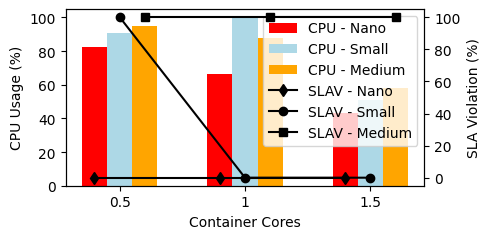

In [41]:
cores = [0.5, 1, 1.5]
sla_nano = [0.1, 0.1, 0.1]
sla_small = [100, 0.1, 0.1]
sla_medium = [100, 100.0, 100.0]
cpu_500 = [82.40, 66.40, 43.26]
cpu_1000 = [90.80, 100.00, 50.80]
cpu_1500 = [94.84, 87.60, 58.26]

fig, ax1 = plt.subplots(1, 1, figsize=(5,2.5))

# Plot SLA Violation on the first y-axis
ax1.set_xlabel('Container Cores')
ax1.set_ylabel('CPU Usage (%)')
bar_width = 0.2
x = np.arange(len(cores))
ax1.bar(x - bar_width, cpu_500, bar_width, label='CPU - Nano', color='red')
ax1.bar(x, cpu_1000, bar_width, label='CPU - Small', color='lightblue')
ax1.bar(x + bar_width, cpu_1500, bar_width, label='CPU - Medium', color='orange')
ax1.legend()

# Create the second y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('SLA Violation (%)')

# Plot CPU usage for each core
line1, = ax2.plot(x - bar_width, sla_nano, marker='d', color='black', linestyle='-', label='SLAV - Nano')
line2, = ax2.plot(x, sla_small, marker='o', color='black', linestyle='-', label='SLAV - Small')
line3, = ax2.plot(x + bar_width, sla_medium, marker='s', color='black', linestyle='-', label='SLAV - Medium')

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right')

fig.tight_layout()
# Set x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(cores)
plt.savefig('paper_graphs/motivation_sla_800.pdf', format='pdf')
plt.show()


# Median CPU Usage

In [67]:
df_pod_cpu = df_pod.groupby(['model', 'cpu_request'])['cpu_usage_percentage'].quantile(0.95).reset_index()
df_pod_cpu.sort_values(['cpu_request', 'model'], inplace=True)
df_pod_cpu.reset_index(inplace=True, drop=True)
df_pod_cpu

,model,cpu_request,cpu_usage_percentage
0,medium,500,93.400000
1,nano,500,81.400000
2,small,500,90.600000
3,medium,1000,86.800000
4,nano,1000,65.300000
5,small,1000,78.900000
6,medium,1500,57.666667
7,nano,1500,42.600000
8,small,1500,50.600000


In [68]:
df_pod_cpu['svr'] = svr['per_core_violations']
df_pod_cpu

,model,cpu_request,cpu_usage_percentage,svr
0,medium,500,93.400000,100.0
1,nano,500,81.400000,0.1
2,small,500,90.600000,100.0
3,medium,1000,86.800000,100.0
4,nano,1000,65.300000,0.1
5,small,1000,78.900000,0.1
6,medium,1500,57.666667,100.0
7,nano,1500,42.600000,0.1
8,small,1500,50.600000,0.1


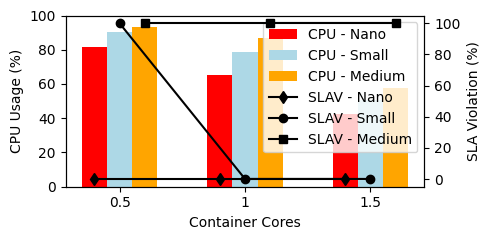

In [72]:
cores = [0.5, 1, 1.5]
sla_nano = [0.1, 0.1, 0.1]
sla_small = [100, 0.1, 0.1]
sla_medium = [100, 100.0, 100.0]
cpu_500 = [81.4, 65.3, 42.6]
cpu_1000 = [90.6, 78.9, 50.6]
cpu_1500 = [93.4, 86.8, 57.66]

fig, ax1 = plt.subplots(1, 1, figsize=(5,2.5))

# Plot SLA Violation on the first y-axis
ax1.set_xlabel('Container Cores')
ax1.set_ylabel('CPU Usage (%)')
bar_width = 0.2
x = np.arange(len(cores))
ax1.bar(x - bar_width, cpu_500, bar_width, label='CPU - Nano', color='red')
ax1.bar(x, cpu_1000, bar_width, label='CPU - Small', color='lightblue')
ax1.bar(x + bar_width, cpu_1500, bar_width, label='CPU - Medium', color='orange')
ax1.legend()
ax1.set_ylim([0,100])

# Create the second y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('SLA Violation (%)')

# Plot CPU usage for each core
line1, = ax2.plot(x - bar_width, sla_nano, marker='d', color='black', linestyle='-', label='SLAV - Nano')
line2, = ax2.plot(x, sla_small, marker='o', color='black', linestyle='-', label='SLAV - Small')
line3, = ax2.plot(x + bar_width, sla_medium, marker='s', color='black', linestyle='-', label='SLAV - Medium')

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right')

fig.tight_layout()
# Set x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(cores)
plt.savefig('paper_graphs/motivation_mean_cpu.pdf', format='pdf')
plt.show()


# Notes
1. No chance to deply Medium version given its 100% SLA violation for each core for 0.8 seconds SLA
2. Nano can meet SLA for each core, small violates SLA for 0.5 core only
3. It is 99th perntile CPU usage percentage
4. it is for Guranteed Class with user restricted Vertical Scaling limits


In [34]:
df_pod_cpu

,model,cpu_request,cpu_usage_percentage,svr
0,medium,500,94.842000,100.0
1,nano,500,82.400000,0.1
2,small,500,90.800000,100.0
3,medium,1000,87.600000,100.0
4,nano,1000,66.400000,0.1
5,small,1000,100.000000,0.1
6,medium,1500,58.266667,100.0
7,nano,1500,43.266667,0.1
8,small,1500,50.800000,0.1


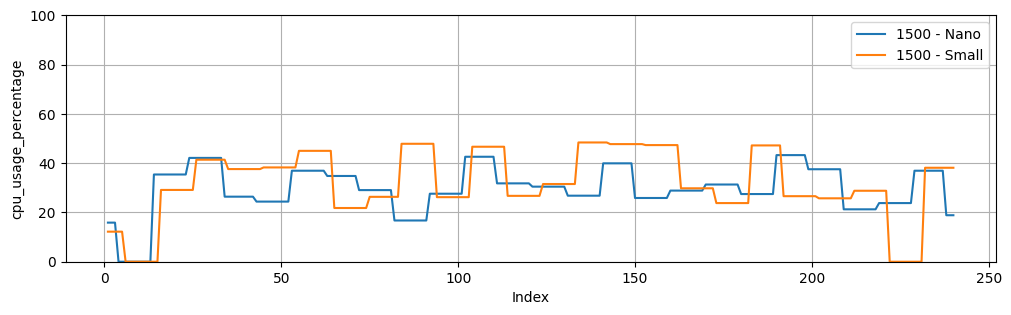

In [40]:
plt.figure(figsize=(12,3.2))
plt.plot(dfn15_pod.index[1:241], dfn15_pod['cpu_usage_percentage'][1:241], label='1500 - Nano')
plt.plot(dfs15_pod.index[1:241], dfs15_pod['cpu_usage_percentage'][1:241], label='1500 - Small')
#plt.plot(dfm15.index[1:], dfm15['cpu_usage_percentage'][1:], label='1500 - Medium')
#plt.plot(dfl15.index[1:], dfl15['cpu_usage_percentage'][1:], label='1500 - Large')

plt.grid()
plt.legend()
plt.ylim([0,100])
plt.xlabel('Index')
plt.ylabel('cpu_usage_percentage')
plt.show()

In [34]:
# Get hex values for the colors
red_hex = mcolors.to_hex('red', keep_alpha=0.7)
lightblue_hex = mcolors.to_hex('lightblue')
orange_hex = mcolors.to_hex('orange')

print("Red Hex:", red_hex)            # Output: #FF0000
print("Light Blue Hex:", lightblue_hex)  # Output: #ADD8E6
print("Orange Hex:", orange_hex)       # Output: #FFA500


Red Hex: #ff0000ff
Light Blue Hex: #add8e6
Orange Hex: #ffa500


In [1]:
import os

In [7]:
def create_incremented_folder(base_path):
    # Get all folder names in the base path
    existing_folders = os.listdir(base_path)
    
    # Extract folders that are purely integers
    numbered_folders = [int(folder) for folder in existing_folders if folder.isdigit()]
    
    # Determine the next folder number
    next_number = max(numbered_folders) + 1 if numbered_folders else 1
    
    # Create the new folder path
    new_folder_path = os.path.join(base_path, str(next_number))
    os.makedirs(new_folder_path)

    return new_folder_path

In [8]:
base_path = '/home/babarali/OSKube/scheduler/patch_checkpoints/'
save_path = create_incremented_folder(base_path)

In [9]:
save_path


'/home/babarali/OSKube/scheduler/patch_checkpoints/3'